# Regresja liniowa i wielomianowa

In [53]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

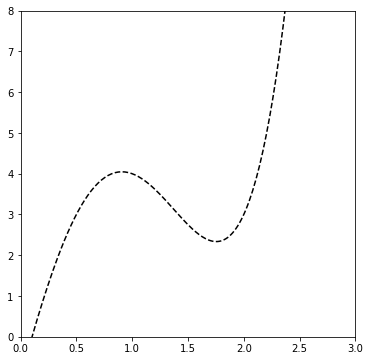

In [54]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k')
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)$.

Na ich podstawie będziemy wykonywać naszej presykcji.

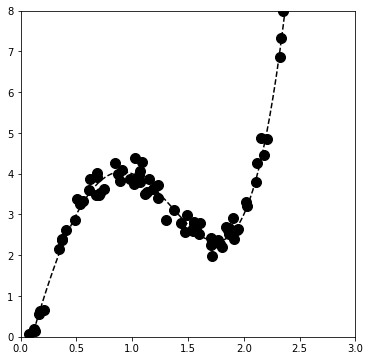

In [55]:
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k')
plt.plot(x, y, 'ok', ms=10)
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.
My narazie urzyjemy metody opartej na rozwiązaniu układu równań liniowych.

In [56]:
x=np.vstack(x)
model1 = linear_model.LinearRegression()
model1.fit(x, y)

LinearRegression()

In [57]:
print(model1.coef_)
print(model1.intercept_)
print(model1.score(x,y))

[6.19250305]
-3.2191603645475864
0.5172509514012715


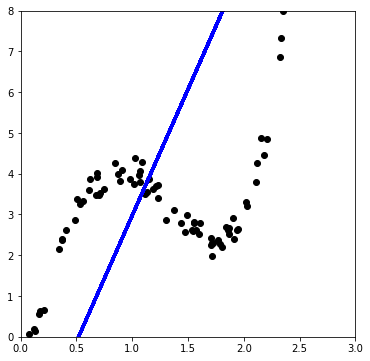

In [58]:
# Plot outputs
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x, model1.predict(x), color='blue',linewidth=3)
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [60]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

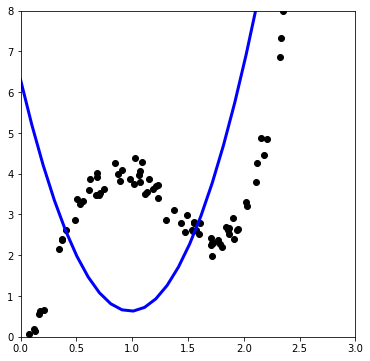

In [61]:
# Plot outputs
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
x_plot = np.vstack(np.linspace(0, 10, 100))
plt.plot(x_plot, model2.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

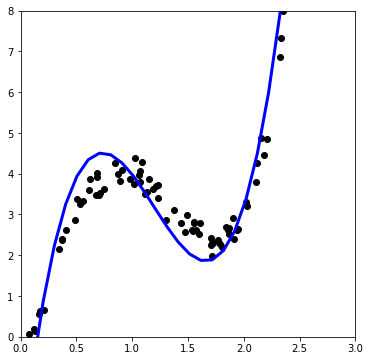

In [62]:
model3 = make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression())
model3.fit(x, y)

# Plot outputs
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
x_plot = np.vstack(np.linspace(0, 10, 100))
plt.plot(x_plot, model3.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

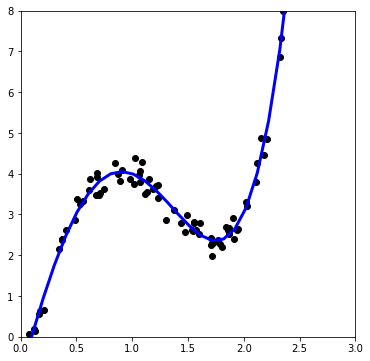

In [63]:
model4 = make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression())
model4.fit(x, y)

# Plot outputs
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
x_plot = np.vstack(np.linspace(0, 10, 100))
plt.plot(x_plot, model4.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + a_5 \cdot x^5 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

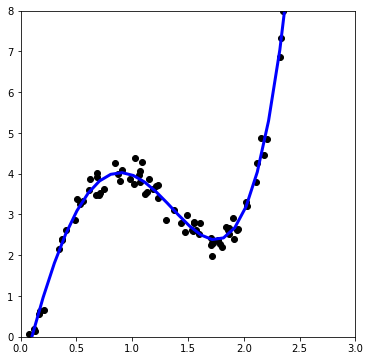

In [64]:
model5 = make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression())
model5.fit(x, y)

# Plot outputs
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
x_plot = np.vstack(np.linspace(0, 10, 100))
plt.plot(x_plot, model5.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zadanie
Narysuj wszystkie wyniki na jednym wykresie.

## Która z krzywych jest najleprza?

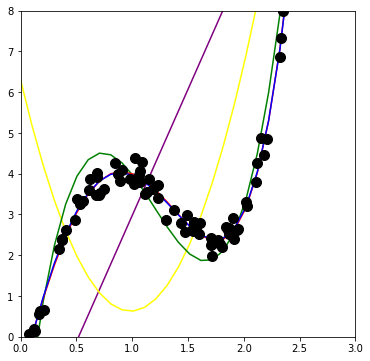

In [65]:
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_plot, model1.predict(x_plot), 'purple')
plt.plot(x_plot, model2.predict(x_plot), 'yellow')
plt.plot(x_plot, model3.predict(x_plot), 'g')
plt.plot(x_plot, model4.predict(x_plot), 'r')
plt.plot(x_plot, model5.predict(x_plot), 'b')
plt.plot(x, y, 'ok', ms=10)
plt.show()

# najlepszą krzywą jest ta czwartego stopnia, gdyż niemalże pokrywa punkty, a jest lepsza od piątego stopnia, gdyż im mniejszy stopień, tym lepiej


# Zadanie
Musimy mieć jakąś miarę oceny.

In [66]:
from sklearn import  metrics

def show_model_stats(model):
    error1 = np.average( np.abs(model.predict(x) -y) )
    print("Mean absolute errors: {}".format(error1))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y, model.predict(x))))

    error2 = np.average( (model.predict(x) -y) **2 )
    print("Mean squared error: {}".format(error2))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y, model.predict(x)) ))

    error3 = np.median( np.abs(model.predict(x) -y) )
    print("Median absolute error: {}".format( error3 ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y, model.predict(x)) ))

    print("R^2: {}".format(metrics.r2_score(y, model.predict(x))))
    ss_res=np.sum( (y-model.predict(x))**2 )
    ss_tot=np.sum( (y-np.mean(y))**2 )
    R=1-ss_res/ss_tot
    print("R^2: {}".format(R))

    error4 = 1-np.var(y - model.predict(x) )/np.var(y)
    print("Explained variance score: {}".format( error4 ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y, model.predict(x)) ))

show_model_stats(model1)


Mean absolute errors: 3.8148239613531074
Mean absolute errors: 3.8148239613531074
Mean squared error: 23.73374247963237
Mean squared error: 23.73374247963237
Median absolute error: 3.231034316151148
Median absolute error: 3.231034316151148
R^2: 0.5172509514012715
R^2: 0.5172509514012715
Explained variance score: 0.5172509514012715
Explained variance score: 0.5172509514012715


# Zadanie

Wylicz powyższe miary dla wszytkich modeli.

In [67]:
models = [model1, model2, model3, model4, model5]

for model in models:
    show_model_stats(model)
    print("====")

Mean absolute errors: 3.8148239613531074
Mean absolute errors: 3.8148239613531074
Mean squared error: 23.73374247963237
Mean squared error: 23.73374247963237
Median absolute error: 3.231034316151148
Median absolute error: 3.231034316151148
R^2: 0.5172509514012715
R^2: 0.5172509514012715
Explained variance score: 0.5172509514012715
Explained variance score: 0.5172509514012715
====
Mean absolute errors: 2.666109965113385
Mean absolute errors: 2.666109965113385
Mean squared error: 10.028157604902855
Mean squared error: 10.028157604902855
Median absolute error: 2.677612057911305
Median absolute error: 2.677612057911305
R^2: 0.7960252772136784
R^2: 0.7960252772136784
Explained variance score: 0.7960252772136784
Explained variance score: 0.7960252772136784
====
Mean absolute errors: 0.5705934647584675
Mean absolute errors: 0.5705934647584675
Mean squared error: 0.48843193632327847
Mean squared error: 0.48843193632327847
Median absolute error: 0.5290163820610245
Median absolute error: 0.52901